# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Respuesta:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as imp

## Lectura de datos

In [2]:
datos = pd.read_csv('datos/diabetes.csv')

Ahora que los datos han sido leidos necesitamos saber que variables son significativas y cuales no, para lo cual debemos hacer una correlacion entre las variables.

In [3]:
corr = datos.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Ahora veamos la correlación de manera grafica

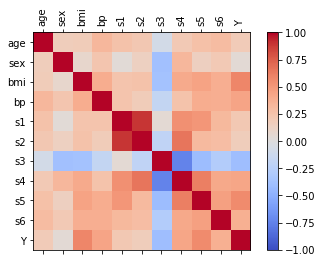

In [4]:
fig = imp.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1,vmax =1)
fig.colorbar(cax)
ticks = np.arange(0,len(datos.columns),1)
ax.set_xticks(ticks)
imp.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(datos.columns)
ax.set_yticklabels(datos.columns)
imp.show()

Tanto en la grafica como en la tabla podemos ver que las variables s1 y s2 estan altamente correlacionadas, por lo cual podemos eliminar una de estas sin perder demasiada información.

Para determinar cual eliminar hacemos un grafico de importancia usando la recursive feature elimination.

D:\Juanes\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Juanes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Juanes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Juanes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Juanes\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default mul

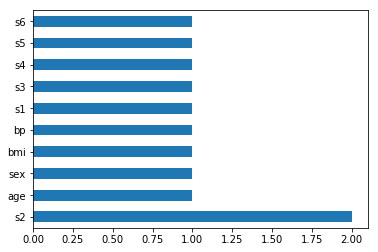

In [5]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

diabetes_data = datos.drop(['Y'],axis=1)
diabetes_target = datos[['Y']]

model = LogisticRegression()
rfe = RFE(model,9)
rfe = rfe.fit(diabetes_data,diabetes_target)

imp_importances = pd.Series(rfe.ranking_, index = diabetes_data.columns)
imp_importances.nlargest(10).plot(kind='barh')
imp.show()

En la grafica anterior podemos ver que la variable s2 es la menos importante de todas las variables por lo cual sera esta la que salga del modelo.

In [6]:
diabetes_data = datos.drop(['s2','Y'],axis=1)
diabetes_data.head()

,age,sex,bmi,bp,s1,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.008142,-0.002592,-0.031991,-0.046641


## Modelo lineal
Ya con el dataset depurado, procedemos a hacer el modelo de regresión lineal, adicional a este veremos si al aplicar alguna transformacion lineal el modelo se optimiza

### Sin transformación

In [7]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics

data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)

linearModel = linear_model.LinearRegression()
linearModel.fit(data_train,target_train)

Linear_predictions = linearModel.predict(data_test)
print('Metricas modelo sin transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,Linear_predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,Linear_predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,Linear_predictions)))

Metricas modelo sin transfromacion
Error absoluto de la media: 40.554120431307716
Error cuadratico de la media: 2593.2377815012132
Error cuadratico de la respuesta: 50.9238429569216


### Transformación cuadratica

In [8]:
squareTransform = lambda x:x**2

dataFrameTransformed = diabetes_data.apply(squareTransform)
targetTransformed = diabetes_target.apply(squareTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))

Metricas modelo con transfromacion
Error absoluto de la media: 20994.760212533933
Error cuadratico de la media: 697368611.7150801
Error cuadratico de la respuesta: 26407.737724293616


### Transformación cúbica

In [9]:
cubicTransform = lambda x:x**3

dataFrameTransformed = diabetes_data.apply(cubicTransform)
targetTransformed = diabetes_target.apply(cubicTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))

Metricas modelo con transfromacion
Error absoluto de la media: 5701635.12489885
Error cuadratico de la media: 66639132302316.68
Error cuadratico de la respuesta: 8163279.50656577


### Transformación exponencial

In [10]:
exponentialTransform = lambda x:np.exp(x)

dataFrameTransformed = diabetes_data.apply(exponentialTransform)
targetTransformed = diabetes_target.apply(exponentialTransform)

data_train, data_test, target_train, target_test = train_test_split(dataFrameTransformed,targetTransformed, test_size=0.30)

linearModel = linear_model.LinearRegression()
model = linearModel.fit(data_train,target_train)

predictions = linearModel.predict(data_test)
print('Metricas modelo con transfromacion')
print('Error absoluto de la media:', metrics.mean_absolute_error(target_test,predictions))
print('Error cuadratico de la media:', metrics.mean_squared_error(target_test,predictions))
print('Error cuadratico de la respuesta:', np.sqrt(metrics.mean_squared_error(target_test,predictions)))

Metricas modelo con transfromacion
Error absoluto de la media: 1.396285159776593e+148
Error cuadratico de la media: 2.558282239037152e+298
Error cuadratico de la respuesta: 1.5994631096205852e+149


### Resultado: Dado que los errores de cada una de las tranformaciones son extremadamente altos se concluye que no se debe realizar ninguna transformación al modelo.

## Red neuronal

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)

history_nn = []

neurons = [2,4,8,16,32,64]

for h in neurons:

    ## crea el modelo vacio
    model = tf.keras.Sequential()

    ## capa oculta
    model.add(tf.keras.layers.Dense(h,                         # neuronas en la capa oculta
                                    activation=tf.nn.relu,  # función de activación
                                    input_shape = (9,)))       # una neurona de entrada

    ## capa de salida
    model.add(tf.keras.layers.Dense(1,                         # una neurona de salida
                                    activation='linear')) # capa de salida

    ## optimizacion usando gradiente
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

    ## crea el modelo
    model.compile(optimizer=optimizer,     # optimizador
                  loss='mse',              # función a minimizar
                  metrics=['mse'])  # metricas a reportar

    ## entrena el modelo y guarda
    ## el reporte de entrenamiento
    model.fit(data_train, target_train, epochs=5000, verbose=0)

    ## error de entrenamiento
    y = [u[0] for u in model.predict(data_test).tolist()]
    history_nn.append(metrics.mean_squared_error(target_test,y))

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel('Neuronas')
plt.plot(neurons, history_nn, 'ko-')
plt.grid()

Se estima que con 7 u 8 neuronas el modelo puede hacer una prediccion acertada

### Comparacion resultados

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

diabetes = pd.read_csv('datos/diabetes.csv')

diabetes_data = diabetes.drop(['s2','Y'],axis=1)
diabetes_target = diabetes[['Y']]
data_train, data_test, target_train, target_test = train_test_split(diabetes_data,diabetes_target, test_size=0.30)

from sklearn import linear_model
from sklearn import metrics

linearModel = linear_model.LinearRegression()
linearModel.fit(data_train,target_train)

linearPredictions = linearModel.predict(data_test)

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
## crea el modelo vacio
model = tf.keras.Sequential()

## capa oculta
model.add(tf.keras.layers.Dense(8,                   # neuronas en la capa oculta
                                activation=tf.nn.relu, # función de activación
                                input_shape = (9,)))    # una neurona de entrada

## capa de salida
model.add(tf.keras.layers.Dense(1,                   # una neurona de salida
                                activation='linear')) # capa de salida

## optimizacion usando gradiente
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

## crea el modelo
model.compile(optimizer=optimizer,     # optimizador
                loss='mse',              # función a minimizar
                metrics=['mse'])  # metricas a reportar

## entrena el modelo y guarda
## el reporte de entrenamiento
model.fit(data_train, target_train, epochs=5000, verbose=0)

neuralNetworkPredictions = model.predict(data_test)

In [ ]:
print('sse linear:',metrics.mean_squared_error(target_test,linearPredictions))
print('sse NN:',metrics.mean_squared_error(target_test,neuralNetworkPredictions))